###The dataset used is Breast Cancer Wisconsin Dataset take from UCI Machine Learning Repository. 
####The dataset is a classification dataset and hence we willbe using classifier algorithms. In this program, three supervised machine learning algorithms are used: K-Nearest Neighbors, Random Forest and Support Vector Machine

In [0]:
#importing libraries 
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
#loading the dataset
dataset = pandas.read_csv('data.csv')

In [44]:
#checking the layout of dataset
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [45]:
#checking to see if there any missing values
dataset.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

The last column of the dataset doesnot contribute to the target value. Hence it is removed. this makes it easier for predictions

In [46]:
dataset.drop(dataset.columns[[-1, 0]], axis=1, inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

The machine learning algorithm can only train on binary values. 
The target column 'diagnosis' is label encoded to convert text to binary value. 
It assigns 0 - Malignant
           1 - Beningn

In [47]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
dataset['diagnosis']=le.fit_transform(dataset['diagnosis'])
dataset.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
#looking at the number of Malignant and Beningn type of cancer
dataset['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

Here, take note that value name is a variable name used to plot the correlation between the attributes.

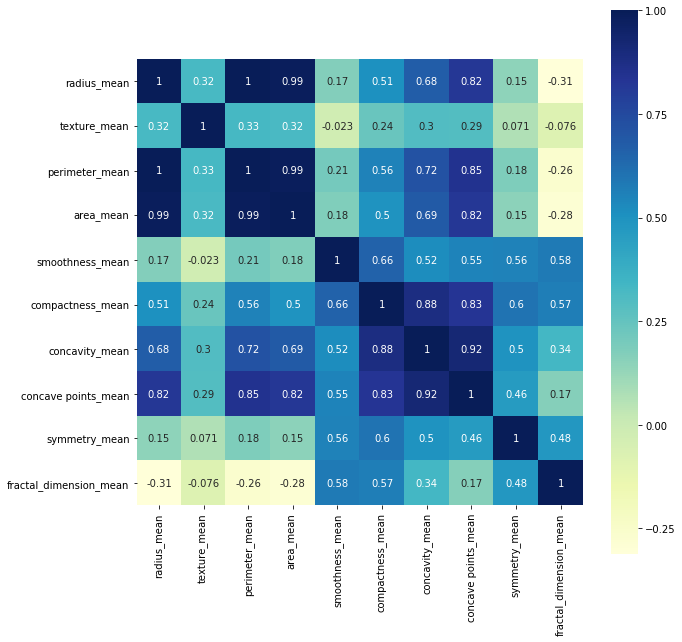

In [49]:
value_mean = list(dataset.columns[1:11])
plt.figure(figsize=(10,10))
sns.heatmap(dataset[value_mean].corr(), annot=True, linecolor = 'black', square=True, cmap='YlGnBu')
plt.show()


In [0]:
#defining X and y and splitting the dataset into train and test. 
#here training data - 80% and remaining test data - 20%
X = dataset.loc[:, value_mean]
y = dataset.loc[:, 'diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

Next, finding the model's ability on the test set by accuracy method. 

In [51]:
#provides train/test indices to split data in train/test sets
from random import seed
from sklearn import model_selection
from sklearn.metrics import accuracy_score


models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors=56)))
models.append(('RF', RandomForestClassifier(n_estimators=40)))
models.append(('SVM', SVC(gamma='auto')))

result = []
names = []

for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  result.append(y_pred)
  names.append(name)
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy', name, accuracy)
  
 

Accuracy KNN 0.9210526315789473
Accuracy RF 0.956140350877193
Accuracy SVM 0.6929824561403509


It can be seen that the trained model predicted well with KNN and RF. You can tune the parameters for the algorithm or find the best values for the parameters.
Whereas SVM didnot do well with the default parameters and hence we will be using Parameter Tuning Method - Grid Search and Random Search

In [52]:
#Random Search
#probability distribution function
from sklearn.model_selection import RandomizedSearchCV
import scipy
#specifying the parameters to be tuned
params = {'C': scipy.stats.expon(scale=3), 'gamma': scipy.stats.expon(scale=.1),          #exponential continuous random variable Default scale-1
  'kernel': ['rbf'], 'class_weight':['balanced', None]}

svm = SVC()
random = RandomizedSearchCV(estimator=svm, param_distributions=params, cv=10, n_jobs=-1)
randomw = random.fit(X,y)

print("Best: %f using %s" % (randomw.best_score_, randomw.best_params_)) 

Best: 0.880492 using {'C': 0.595492103226796, 'class_weight': None, 'gamma': 0.008697692580889161, 'kernel': 'rbf'}


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [53]:
#using the above found parameters to re-evaluate SVM
svm = SVC(C = 7.686874771315509, class_weight = 'balanced', gamma = 0.005360399747907645, kernel = 'rbf')
svm.fit(X_train, y_train)
prediction = svm.predict(X_test)
print('Accuracy of SVM on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('Accuracy of SVM on test set: {:.2f}'.format(svm.score(X_test, y_test)))

Accuracy of SVM on training set: 0.95
Accuracy of SVM on test set: 0.88


It can be observed that SVM predicted better when tuned than on using default parameters

In [54]:
#Using Grid Search 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
clf = SVC(kernel = 'rbf')
print(clf)

grid = {'C': [0.01, 0.1, 1, 10],
        'gamma': [0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(clf, param_grid = grid, cv = 5, scoring = 'recall')
y_prediction = grid_search.fit(X_train, y_train).decision_function(X_test)
clf_best = grid_search.best_estimator_
y_prediction = clf_best.predict(X_test)
print('recall score =  {:.2f}'.format(recall_score(y_test, y_prediction)))
print('precision score =  {:.2f}'.format(precision_score(y_test, y_prediction)))

print('Grid best parameter:', grid_search.best_params_)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
recall score =  0.77
precision score =  0.88
Grid best parameter: {'C': 10, 'gamma': 0.01}


The Precision-Recall (P-R) curve is created by looking at the decision function output of the classifier.
It is used to find the recall when given a precision value or vice-versa

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


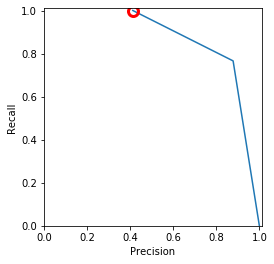

In [55]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_prediction)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 10, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.axes().set_aspect('equal')
plt.show()

Here we also plot the ROC-AUC curve. It indicates capability of the model in distinguishing between classes. 
AUC curve gives the measure of capability. Higher the AUC, better the model is at distinguishing between classes.  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


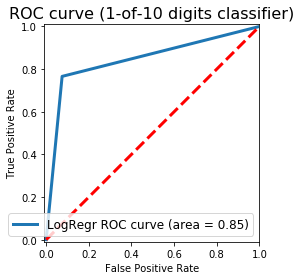

In [56]:
from sklearn.metrics import roc_curve, auc
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prediction)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.plot([0, 1], [0, 1], color='red', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [57]:
# Combined report with all above metrics
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prediction))      #here 0 - malignant, 1- benign

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        67
           1       0.88      0.77      0.82        47

    accuracy                           0.86       114
   macro avg       0.86      0.85      0.85       114
weighted avg       0.86      0.86      0.86       114



The above report gives an idea about how the model has trained on the dataset. The Precision metric denotes that the model has predicted 85% accuractely for malignant type of cancer and 88% for benign. 
Recall gives the average of positive instances in a dataset.